In [1]:
import pandas as pd
import numpy as np
import time
import re
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from pprint import pprint
from copy import copy, deepcopy

In [2]:
# games in string form
oscar_ikhlas_071919_short = '1.e4 e6 2.g3 Bc5 3.Bg2 Qf6 4.Nf3 g5 5.h3 Nc6 6.c3 d5 7.d3 d4 8.Bxg5 Qg7 9.c4 f6 10.Bh4 f5 11.Nbd2 b6 12.exf5 exf5 13.Ng5 Nb4 14.O-O Nxd3 15.Bxa8 Nxb2 16.Qe2+ Kf8 17.Bc6 Ne7 18.Bg2 h6 19.Ngf3 d3 20.Bxe7+ Bxe7 21.Qe5 Bf6 22.Qb5 Rg8 23.Rab1 Na4 24.Qxa4 f4 25.g4 Bxg4 26.c5 Bxf3 27.Nxf3 Qxg2#'
oscar_ikhlas_071919_long = '1.Pe2e4 Pe7e6 2.Pg2g3 Bf8c5 3.Bf1g2 Qd8f6 4.Ng1f3 Pg7g5 5.Ph2h3 Nb8c6 6.Pc2c3 Pd7d5 7.Pd2d3 Pd5d4 8.Bc1xg5 Qf6g7 9.Pc3c4 Pf7f6 10.Bg5h4 Pf6f5 11.Nb1d2 Pb7b6 12.Pe4xf5 Pe6xf5 13.Nf3g5 Nc6b4 14.O-O Nb4xd3 15.Bg2xa8 Nd3xb2 16.Qd1e2+ Ke8f8 17.Ba8c6 Ng8e7 18.Bc6g2 Ph7h6 19.Ng5f3 Pd4d3 20.Bh4xe7+ Bc5xe7 21.Qe2e5 Be7f6 22.Qe5b5 Rh8g8 23.Ra1b1 Nb2a4 24.Qb5xa4 Pf5f4 25.Pg3g4 Bc8xg4 26.Pc4c5 Bg4xf3 27.Nd2xf3 Qg7xg2#'
game1_short = '1.e4 e5 2.Nf3 d6 3.d4 Bg4 4.dxe5 Bxf3 5.Qxf3 dxe5 6.Bc4 Nf6 7.Qb3 Qe7 8.Nc3 c6 9.Bg5 b5 10.Nxb5 cxb5 11.Bxb5+ Nbd7 12.Rd1 Rd8 13.f4 exf4 14.Bxf4 Nh5 15.Bc7 Qc5 16.Bxd8 Kxd8 17.Rxd7+ Kc8 18.Rxf7 a6 19.Qe6+ Kb8 20.Qe8+ Qc8 21.Qxc8+ Kxc8 22.Bd7+ Kd8 23.Rhf1 g5 24.h4 Kc7 25.R1f6 Kb8 26.Rxa6 Kb7 27.Bb5+ Kb8 28.Bc6 Kc8 29.Ra8#'
game1_long = '1.Pe2e4 Pe7e5 2.Ng1f3 Pd7d6 3.Pd2d4 Bc8g4 4.Pd4xe5 Bg4xf3 5.Qd1xf3 Pd6xe5 6.Bf1c4 Ng8f6 7.Qf3b3 Qd8e7 8.Nb1c3 Pc7c6 9.Bc1g5 Pb7b5 10.Nc3xb5 Pc6xb5 11.Bc4xb5 Nb8d7 12.Ra1d1 Ra8d8 13.Pf2f4 Pe5xf4 14.Bg5xf4 Nf6h5 15.Bf4c7 Qe7c5 16.Bc7xd8 Ke8xd8 17.Rd1xd7+ Kd8c8 18.Rd7xf7 Pa7a6 19.Qb3e6+ Kc8b8 20.Qe6e8+ Qc5c8 21.Qe8xc8+ Kb8xc8 22.Bb5d7+ Kc8d8 23.Rh1f1 Pg7g5 24.Ph2h4 Kd8c7 25.Rf1f6 Kc7b8 26.Rf6xa6 Kb8b7 27.Bd7b5 Kb7b8 28.Bb5c6 Kb8c8 29.Ra6a8#'
test_special_char = '42.Ng1-f3 Ng1-f3 43.Ng1+f3 Ng1+f3 44.Ng1f3+ Ng1f3+ 45.Ng1#f3 Ng1#f3 46.Ng1f3# Ng1f3# 47.h8=Q h8=Q 48.h8= h8= 49.0-0 0-0 50.0-0-0 0-0-0 51.d4e.p. d4e.p. 52.d4ep d4ep 53.d4 e.p. d4 e.p. 54.d4 ep d4 ep'
opener_example = {"Philidor's Defense": ['Pe2e4', 'Pe7e5', 'Ng1f3', 'Pd7d6']}

In [3]:
game1_long

'1.Pe2e4 Pe7e5 2.Ng1f3 Pd7d6 3.Pd2d4 Bc8g4 4.Pd4xe5 Bg4xf3 5.Qd1xf3 Pd6xe5 6.Bf1c4 Ng8f6 7.Qf3b3 Qd8e7 8.Nb1c3 Pc7c6 9.Bc1g5 Pb7b5 10.Nc3xb5 Pc6xb5 11.Bc4xb5 Nb8d7 12.Ra1d1 Ra8d8 13.Pf2f4 Pe5xf4 14.Bg5xf4 Nf6h5 15.Bf4c7 Qe7c5 16.Bc7xd8 Ke8xd8 17.Rd1xd7+ Kd8c8 18.Rd7xf7 Pa7a6 19.Qb3e6+ Kc8b8 20.Qe6e8+ Qc5c8 21.Qe8xc8+ Kb8xc8 22.Bb5d7+ Kc8d8 23.Rh1f1 Pg7g5 24.Ph2h4 Kd8c7 25.Rf1f6 Kc7b8 26.Rf6xa6 Kb8b7 27.Bd7b5 Kb7b8 28.Bb5c6 Kb8c8 29.Ra6a8#'

In [4]:
class Parse():
    
    def parse_game(self, string):
        """
        Returns a DICTIONARY of all turns from the game.

        Example:
        >>> parse_game(game1)
        {1: ['c4', 'e6'],
         2: ['Nf3', 'd5'], ...}
        """
        full_game = string
        full_game_turns_only = re.sub(r'[0-9]{1,3}\.', '', full_game)
        full_game_ep1 = re.sub('e.p.', 'ep', full_game_turns_only)
        full_game_ep2 = re.sub(r' e\.?p\.?', 'ep', full_game_ep1)
        full_game_latest = full_game_ep2
        turns = full_game_latest.split()

        turns_dict = {}
        for i in range(0, len(turns[::2])):
            try: turns_dict[i+1] = [turns[::2][i], turns[1::2][i]]
            except: turns_dict[i+1] = [turns[::2][i]]
        return turns_dict
    
    def parse_move(self, string):
        """
        Parses a move into:
            STRINGs of unit, from_coord, to_coord,
            and
            BOOLEANs of capture, castling, and check status.

        Examples:
        >>> parse_move('f3'):
        ('P', 'f?', 'f3', False, False, False)
        >>> parse_move('Ng1-f3'):
        ('N', 'g1', 'f3', False, False, False)
        >>> parse_move('Q7xf6+')
        ('Q', '7?', 'f6', True, False, True)
        >>> parse_move('Qb3xb4')
        ('Q', 'b3', 'b4', True, False, False)

        Todo: Check for capitalization in 'x' for example (non-urgent)
        """
        # check state
        check = False
        if '+' in string: check = True
        if '++' in string: check = True
        if '#' in string: check = True

        # unit
        try: unit = re.match(r'^[R|N|B|Q|K]', string)[0]
        except: unit = 'P'

        # capture
        capture = False
        if re.search('x|ep', string):
            capture = True

        # positions
        pos = re.findall(r'[a-h][1-8]', string)
        from_ = '?'
        to_ = '?'
        if len(pos) > 1:
            from_ = pos[0]
            to_ = pos[1]
        elif len(pos) == 1:
            to_ = pos[0]
            # parse from_ character before capture 'x'
            if from_ == '?':
                try: from_ = re.search(r'[a-h][x]', string)[0][0] + '?'
                except: pass
            if from_ == '?':
                try: from_ = '?' + re.search(r'[1-8][x]', string)[0][0]
                except: pass
            # parse from_ character with no 'x'
            if from_ == '?':
                try: from_ = re.search(r'[a-h][a-h][1-8]', string)[0][0] + '?'
                except: pass
            if from_ == '?':
                try: from_ = '?' + re.search(r'[1-8][a-h][1-8]', string)[0][0]
                except: pass
            # if pawn and no other info, from_ is on the same file.
            if from_ == '?' and unit == 'P':
                try: from_ = pos[0][0] + '?'
                except: pass

        # castling
        castling = False
        castling_options = ['O-O', 'O-O-O', '0-0', '0-0-0']
        if string in castling_options:
            unit, from_, to_, capture, castling = '?', '?', '?', True, True

        return unit, from_, to_, capture, castling, check
    
    def convert_name(self, string):
        name = '?'
        u = self.parse_move(string)[0]
        if u == 'P': name = 'Pawn'
        elif u == 'R': name = 'Rook'
        elif u == 'N': name = 'Knight'
        elif u == 'B': name = 'Bishop'
        elif u == 'Q': name = 'Queen'
        elif u == 'K': name = 'King'
        return name
    

In [5]:
class Board():
    a_n = {"a": 0, "b": 1, "c": 2, "d": 3, "e": 4, "f": 5, "g": 6, "h": 7}
    n_a = {j:i for i,j in a_n.items()} # reverse of list a_n (ex. {0:"a", 1:"b", ...})
    
    def __init__(self):
        self.board = self.new_board()
        self.history = []
        self.player = 'w'
        self.turn = 1
        self.past = []
    
    def new_board(self):
        """
        Returns this starting board:
        [['R1b', 'N1b', 'B1b', 'Q0b', 'K0b', 'B2b', 'N2b', 'R2b'],
         ['P1b', 'P2b', 'P3b', 'P4b', 'P5b', 'P6b', 'P7b', 'P8b'],
         ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
         ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
         ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
         ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
         ['P1w', 'P2w', 'P3w', 'P4w', 'P5w', 'P6w', 'P7w', 'P8w'],
         ['R1w', 'N1w', 'B1w', 'Q0w', 'K0w', 'B2w', 'N2w', 'R2w']]
        """
        self.gameboard = np.zeros((8,8), dtype=str).tolist()
        self.gameboard[0] =  ['R1b', 'N1b', 'B1b', 'Q0b', 'K0b', 'B2b', 'N2b', 'R2b']
        self.gameboard[1] =  ['P1b', 'P2b', 'P3b', 'P4b', 'P5b', 'P6b', 'P7b', 'P8b']
        self.gameboard[-2] = ['P1w', 'P2w', 'P3w', 'P4w', 'P5w', 'P6w', 'P7w', 'P8w']
        self.gameboard[-1] = ['R1w', 'N1w', 'B1w', 'Q0w', 'K0w', 'B2w', 'N2w', 'R2w']
        for each_row in self.gameboard:
            for n,i in enumerate(each_row):
                if i == '': each_row[n] = '   '
        return self.gameboard
    
    def returnBoard(self):
        """ Self explanatory. """
        return self.board
    
    def player_is(self):
        """ Returns whose turn it is. """
        if self.player == 'w': return "White"
        if self.player == 'b': return "Black"
    
    def pos_to_coord(self, string):
        """
        Returns a TUPLE of the coordinate of a position.
        
        Example:
        >>> pos_to_coord('a1')
        (0, 7)
        """
        x = Board().a_n[string[0]]
        y = 8 - int(string[1])
        coordinate = (int(x), int(y))
        return coordinate
    
    def find_unit_at_pos(self, pos):
        """
        Returns a STRING of the unit at a position given the
        current state of the board.

        Example:
        >>> find_unit_at_pos('d1')
        Q w
        """
        x = Board().a_n[pos[0].lower()]
        y = 8 - int(pos[1])
        unit = self.board[y][x]
        return unit
    
    def get_coord_from(self, string):
        """
        Returns TUPLE of array position of starting point.

        Example:
        >>> get_coord_from('Ra1b5')
        (0, 7)
        """
        x = None
        y = None
        try: x = Board().a_n[Parse().parse_move(string)[1][0]]
        except: None
        try: y = 8 - int(Parse().parse_move(string)[1][1])
        except: None
        return (x, y)

    def get_coord_to(self, string):
        """
        Returns TUPLE of array position of ending point.

        Example:
        >>> get_coord_to('Ra1b5')
        (1, 3)
        """
        x = None
        y = None
        try: x = Board().a_n[Parse().parse_move(string)[2][0]]
        except: None
        try: y = 8 - int(Parse().parse_move(string)[2][1])
        except: None
        return (x, y)
    
    def find_unit_at_coord(self, coord):
        """
        Returns a STRING of the unit at a coordinate given
        the current state of the board.

        Example:
        >>> find_unit_at_coord((0,7))
        R b
        """
        unit = self.board[coord[1]][coord[0]]
        return unit
    
    def chose_empty_pos(self, string):
        """
        Returns TRUE if position traveling to is empty.

        Examples:
        >>> chose_empty_pos('b4')
        True
        >>> chose_empty_pos('g7')
        False
        """
        unit_on_pos = self.find_unit_at_pos(Parse().parse_move(string)[2])
        if unit_on_pos == '   ': return True
        else: return False

    def chose_correct_unit(self, string):
        """
        Returns TRUE if unit was chosen correctly.

        Examples:
        >>> chose_correct_unit('Ra1a2')
        True
        >>> chose_correct_unit('Ra2a3')
        False
        """
        unit_parsed = Parse().parse_move(string)[0]
        unit_on_pos = self.find_unit_at_pos(Parse().parse_move(string)[1])
        if unit_parsed == unit_on_pos[0]: return True
        else: return False
    
    def capture_was_correct(self, string):
        """
        Returns TRUE if capture was correct for position traveling to
        (also observes player status)

        Example:
        >>> capture_was_correct('Rbxb7')
        True

        Todo: Not yet tuned for en passant.
        """
        capturing = False
        color_of_unit_capturing = self.find_unit_at_pos(Parse().parse_move(string)[1])[-1]
        color_of_unit_captured = self.find_unit_at_pos(Parse().parse_move(string)[2])[-1]
        
        if Parse().parse_move(string)[3] == True:
            capturing = True
        if capturing == False and self.chose_empty_pos(string) == True:
            return True
        if capturing == True and self.chose_empty_pos(string) == False and color_of_unit_capturing != color_of_unit_captured:
            return True
        else: return False
    
    def move(self, string):
        if self.chose_correct_unit(string) and self.capture_was_correct(string):
            color_of_unit = self.find_unit_at_pos(Parse().parse_move(string)[1])[-1]
            if color_of_unit == self.player:
                # update player
                print1 = self.player_is() + "'s move:"
                if self.player == 'w': self.player = 'b'
                elif self.player == 'b': self.player = 'w'
                
                # update turn
                print2 = "Turn #" + str(self.turn)
                self.turn += 1
                
                # update history
                self.history.append(string)
                print3 = "History:", self.history
                
                # update board
                past_pos = self.board[self.get_coord_from(string)[1]][self.get_coord_from(string)[0]]
                fut_pos = self.board[self.get_coord_to(string)[1]][self.get_coord_to(string)[0]]
                self.board[self.get_coord_to(string)[1]][self.get_coord_to(string)[0]] = past_pos
                self.board[self.get_coord_from(string)[1]][self.get_coord_from(string)[0]] = '   '
                return print1, print2, print3, self.board
        
        else:
            print0 = "----INVALID ACTION----. It is " + self.player_is() + "'s move. Last turn:"
            # print player
            if self.player == 'w': self.player = 'b'
            elif self.player == 'b': self.player = 'w'    
            print1 = self.player_is() + " moved:"
            if self.player == 'w': self.player = 'b'
            elif self.player == 'b': self.player = 'w'
            # print turn
            print2 = "Turn #" + str(self.turn)
            # print history
            print3 = "History:", self.history
            # return board
            return print0, print1, print2, print3, self.board
    
    def undo(self):
        try:
            temp_hist = self.history[:]
            self.past.append(self.history.pop())

            self.board = self.new_board()
            self.history = []
            self.player = 'w'
            self.turn = 1
            for each in temp_hist[:-1]:
                self.move(each)
    #         return self.player_is() + "'s move", "Turn #" + str(self.turn), "History: " + str(self.history), self.board
            return self.board
        except: pass
    
    def redo(self):
        try:
            temp_hist = self.history[:]
            temp_hist.append(self.past.pop())

            self.board = self.new_board()
            self.player = 'w'
            self.history = []
            self.turn = 1
            for each in temp_hist:
                self.move(each)
            return self.board
        except: pass
    
    def all_coords(self):
        """
        Returns a LIST OF TUPLES of all coordinates on the board
        that are occupied by a unit.

        Example:
        >>> all_coords()
        [(0, 0), (1, 0), (2, 3), (1, 4), ...]
        """
        all_coords = []
        for i in range(0, len(self.board)):
            each_row = self.board[i]
            for each_pos in range(0, len(self.board)):
                if each_row[each_pos] != '   ':
                    all_coords.append((each_pos, i))
        return all_coords
    
    def coords_to_pos(self, list_of_coords):
        """
        Returns a LIST OF STRINGS of all positions on the board
        that are occupied by a unit.

        Example:
        >>> coords_to_pos(all_coords())
        ['a8', 'b8', 'c5', 'b4', ...]
        """
        translated_pos = []
        for i in range(len(list_of_coords)):
            translated_pos.append(Board().n_a[list_of_coords[i][0]] + str(8 - list_of_coords[i][1]))
        return translated_pos
    
    def unit_to_pos(self, unit_string):
        """
        Returns a STRING of the position given a unit name.

        Example:
        >>> unit_to_pos('P1w')
        a2
        """
        temp_board_array = np.array(self.board)
        position = self.coords_to_pos([(int(np.where(temp_board_array == unit_string)[1][0]),
                                        int(np.where(temp_board_array == unit_string)[0][0]))])
        return position[0]
    
    def unit_to_coord(self, unit_string):
        """
        Returns a TUPLE of the coordinate given a unit name.

        Example:
        >>> unit_to_coord('R1b')
        (0, 0)
        """
        temp_board_array = np.array(self.board)
        coordinates = (int(np.where(temp_board_array == unit_string)[1][0]),
                       int(np.where(temp_board_array == unit_string)[0][0]))
        return coordinates
    
    def list1_minus_list2(self, list1, list2):
        diff = (list(set(list1) - set(list2)))
        return diff

In [6]:
class Piece():
    
#     def add_avail_coords(self, string, op1, op2, value1, value2, posneg):
#         empty_board_moves = []
#         can_attack = []
#         can_protect = []
        
#         for i in range(1,8):
#             next_add = (self.get_coord_from(string)[0] + (i*op1), self.get_coord_from(string)[1] + (i*op2))
#             if posneg*(next_add[value1] < value2): break
#             if next_add not in self.all_coords():
#                 empty_board_moves.append(next_add)
#             if next_add in self.all_coords() and self.find_unit_at_coord(next_add)[-1] != self.player:
#                 can_attack.append(next_add)
#                 break
#             if next_add in self.all_coords() and self.find_unit_at_coord(next_add)[-1] == self.player:
#                 can_protect.append(next_add)
#                 break
        
#         return empty_board_moves, can_attack, can_protect
    
    def v_h_avail(self, string):
        """
        Returns 2 LISTs. The first are all available tuples of
        vertically & horizontally positioned coordinates from the
        given unit. The second are all available tuples of enemies that
        are vertically & horizontally positioned from the given unit.

        Example:
        >>> v_h_avail('Pa2a2')
        ([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 6)],
         [(0, 1)])
        """
        empty_board_moves = []
        can_attack = []
        can_protect = []
        
        # pos' to top
        for i in range(1,8):
            next_add = (self.get_coord_from(string)[0], self.get_coord_from(string)[1] - i)
            if next_add[1] < 0: break
            if next_add not in self.all_coords():
                empty_board_moves.append(next_add)
            if next_add in self.all_coords() and self.find_unit_at_coord(next_add)[-1] != self.player:
                can_attack.append(next_add)
                break
            if next_add in self.all_coords() and self.find_unit_at_coord(next_add)[-1] == self.player:
                can_protect.append(next_add)
                break
        
        # pos' to bottom
        for i in range(1,8):
            next_add = (self.get_coord_from(string)[0], self.get_coord_from(string)[1] + i)
            if next_add[1] > 7: break
            if next_add not in self.all_coords():
                empty_board_moves.append(next_add)
            if next_add in self.all_coords() and self.find_unit_at_coord(next_add)[-1] != self.player:
                can_attack.append(next_add)
                break
            if next_add in self.all_coords() and self.find_unit_at_coord(next_add)[-1] == self.player:
                can_protect.append(next_add)
                break
        
        # pos' to right
        for i in range(1,8):
            next_add = (self.get_coord_from(string)[0] + i, self.get_coord_from(string)[1])
            if next_add[0] > 7: break
            if next_add not in self.all_coords():
                empty_board_moves.append(next_add)
            if next_add in self.all_coords() and self.find_unit_at_coord(next_add)[-1] != self.player:
                can_attack.append(next_add)
                break
            if next_add in self.all_coords() and self.find_unit_at_coord(next_add)[-1] == self.player:
                can_protect.append(next_add)
                break
        
        # pos' to left
        for i in range(1,8):
            next_add = (self.get_coord_from(string)[0] - i, self.get_coord_from(string)[1])
            if next_add[0] < 0: break
            if next_add not in self.all_coords():
                empty_board_moves.append(next_add)
            if next_add in self.all_coords() and self.find_unit_at_coord(next_add)[-1] != self.player:
                can_attack.append(next_add)
                break
            if next_add in self.all_coords() and self.find_unit_at_coord(next_add)[-1] == self.player:
                can_protect.append(next_add)
                break
            
        return sorted(empty_board_moves), sorted(can_attack), sorted(can_protect)
    
    def diag_avail(self, string):
        """
        Returns 2 LISTs. The first are all available tuples of
        diagonally positioned coordinates from the given unit.
        The second are all available tuples of enemies that are
        diagonally positioned from the given unit.

        Example:
        >>> diag_avail('Pa2a2')
        ([(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)],
         [(5, 1)])
        """
        empty_board_moves = []
        can_attack = []
        can_protect = []

        # pos' to top right
        for i in range(1,8):
            next_add = (self.get_coord_from(string)[0] + i, self.get_coord_from(string)[1] - i)
            if next_add[0] > 7 or next_add[1] < 0: break
            if next_add not in self.all_coords():
                empty_board_moves.append(next_add)
            if next_add in self.all_coords() and self.find_unit_at_coord(next_add)[-1] != self.player:
                can_attack.append(next_add)
                break
            if next_add in self.all_coords() and self.find_unit_at_coord(next_add)[-1] == self.player:
                can_protect.append(next_add)
                break

        # pos' to top left
        for i in range(1,8):
            next_add = (self.get_coord_from(string)[0] - i, self.get_coord_from(string)[1] - i)
            if next_add[0] < 0 or next_add[1] < 0: break
            if next_add not in self.all_coords():
                empty_board_moves.append(next_add)
            if next_add in self.all_coords() and self.find_unit_at_coord(next_add)[-1] != self.player:
                can_attack.append(next_add)
                break
            if next_add in self.all_coords() and self.find_unit_at_coord(next_add)[-1] == self.player:
                can_protect.append(next_add)
                break

        # pos' to bottom right
        for i in range(1,8):
            next_add = (self.get_coord_from(string)[0] + i, self.get_coord_from(string)[1] + i)
            if next_add[0] > 7 or next_add[1] > 7: break
            if next_add not in self.all_coords():
                empty_board_moves.append(next_add)
            if next_add in self.all_coords() and self.find_unit_at_coord(next_add)[-1] != self.player:
                can_attack.append(next_add)
                break
            if next_add in self.all_coords() and self.find_unit_at_coord(next_add)[-1] == self.player:
                can_protect.append(next_add)
                break

        # pos' to bottom left
        for i in range(1,8):
            next_add = (self.get_coord_from(string)[0] - i, self.get_coord_from(string)[1] + i)
            if next_add[0] < 0 or next_add[1] > 7: break
            if next_add not in self.all_coords():
                empty_board_moves.append(next_add)
            if next_add in self.all_coords() and self.find_unit_at_coord(next_add)[-1] != self.player:
                can_attack.append(next_add)
                break
            if next_add in self.all_coords() and self.find_unit_at_coord(next_add)[-1] == self.player:
                can_protect.append(next_add)
                break

        return sorted(empty_board_moves), sorted(can_attack), sorted(can_protect)
    
    def P_avail(self, string):
        """
        Returns 2 LISTs. The first are all tuples of possible
        PAWN movements from the current position. The second are
        all tuples of possible PAWN movements from the current
        position where an enemy lies atop.

        Example:
        >>> P_avail('Pa2a3')
        ([(0, 5), (0, 4)],
         [])

        Todo: Does not yet recognize en passant.
        """
        empty_coords = []
        can_attack = []
        can_protect = []
        
        if self.chose_correct_unit(string) and self.player == 'w':
            # one position up
            one_up = (self.get_coord_from(string)[0], self.get_coord_from(string)[1] - 1)
            if 0 <= one_up[0] <= 7 and 0 <= one_up[1] <= 7:
                if one_up not in self.all_coords():
                    empty_coords.append(one_up)
            
            # two positions up
            two_up = (self.get_coord_from(string)[0], self.get_coord_from(string)[1] - 2)
            if 0 <= two_up[0] <= 7 and 0 <= two_up[1] <= 7:
                if two_up not in self.all_coords() and one_up not in self.all_coords():
                    empty_coords.append(two_up)
            
            # can_attack and can_protect
            l_diag = (self.get_coord_from(string)[0] - 1, self.get_coord_from(string)[1] - 1)
            if 0 <= l_diag[0] <= 7 and 0 <= l_diag[1] <= 7:
                if l_diag in self.all_coords():
                    if self.find_unit_at_coord(l_diag)[-1] != self.player:
                        can_attack.append(l_diag)
                    if self.find_unit_at_coord(l_diag)[-1] == self.player:
                        can_protect.append(l_diag)
            r_diag = (self.get_coord_from(string)[0] + 1, self.get_coord_from(string)[1] - 1)
            """ TODO XXX ??? SEEMS LIKE AN ERROR HERE?? """
            if 0 <= r_diag[0] <= 7 and 0 <= r_diag[1] <= 7:
                if r_diag in self.all_coords():
                    if self.find_unit_at_coord(r_diag)[-1] != self.player:
                        can_attack.append(r_diag)
                    if self.find_unit_at_coord(r_diag)[-1] == self.player:
                        can_protect.append(r_diag)
        
        if self.chose_correct_unit(string) and self.player == 'b':
            # one position up
            one_up = (self.get_coord_from(string)[0], self.get_coord_from(string)[1] + 1)
            if 0 <= one_up[0] <= 7 and 0 <= one_up[1] <= 7:
                if one_up not in self.all_coords():
                    empty_coords.append(one_up)
            
            # two positions up
            two_up = (self.get_coord_from(string)[0], self.get_coord_from(string)[1] + 2)
            if 0 <= two_up[0] <= 7 and 0 <= two_up[1] <= 7:
                if two_up not in self.all_coords() and one_up not in self.all_coords():
                    empty_coords.append(two_up)
            
            # can_attack and can_protect
            l_diag = (self.get_coord_from(string)[0] - 1, self.get_coord_from(string)[1] + 1)
            if 0 <= l_diag[0] <= 7 and 0 <= l_diag[1] <= 7:
                if l_diag in self.all_coords():
                    if self.find_unit_at_coord(l_diag)[-1] != self.player:
                        can_attack.append(l_diag)
                    if self.find_unit_at_coord(l_diag)[-1] == self.player:
                        can_protect.append(l_diag)
            r_diag = (self.get_coord_from(string)[0] + 1, self.get_coord_from(string)[1] + 1)
            if 0 <= r_diag[0] <= 7 and 0 <= r_diag[1] <= 7:
                if r_diag in self.all_coords():
                    if self.find_unit_at_coord(r_diag)[-1] != self.player:
                        can_attack.append(r_diag)
                    if self.find_unit_at_coord(r_diag)[-1] == self.player:
                        can_protect.append(r_diag)
        
        return sorted(empty_coords), sorted(can_attack), sorted(can_protect)
    
    def R_avail(self, string):
        """
        Returns 2 LISTs. The first are all tuples of possible
        ROOK movements from the current position. The second are
        all tuples of possible ROOK movements from the current
        position where an enemy lies atop.

        Example:
        >>> R_avail('Ra3a4')
        ([(0, 1), (0, 2), (0, 3), (0, 4), (1, 5)],
         [(0, 1), (1, 5)])
        """
        empty_coords = []
        can_attack = []
        can_protect = []

        if self.chose_correct_unit(string):
            empty_coords = self.v_h_avail(string)[0]
            can_attack = self.v_h_avail(string)[1]
            can_protect = self.v_h_avail(string)[2]
        
        return sorted(empty_coords), sorted(can_attack), sorted(can_protect)
    
    def N_avail(self, string):
        """
        Returns 2 LISTs. The first are all tuples of possible
        KNIGHT movements from the current position. The second are
        all tuples of possible KNIGHT movements from the current
        position where an enemy lies atop.

        Example:
        >>> N_avail('Nd4f5')
        ([(1, 3), (1, 5), (2, 2), (4, 2), (5, 5)],
         [(5, 3)])
        """
        empty_coords = []
        can_attack = []
        can_protect = []
        
        if self.chose_correct_unit(string):
            possibles = []
            possibles.append((self.get_coord_from(string)[0] + 1, self.get_coord_from(string)[1] + 2))
            possibles.append((self.get_coord_from(string)[0] - 1, self.get_coord_from(string)[1] + 2))
            possibles.append((self.get_coord_from(string)[0] + 1, self.get_coord_from(string)[1] - 2))
            possibles.append((self.get_coord_from(string)[0] - 1, self.get_coord_from(string)[1] - 2))
            possibles.append((self.get_coord_from(string)[0] + 2, self.get_coord_from(string)[1] + 1))
            possibles.append((self.get_coord_from(string)[0] + 2, self.get_coord_from(string)[1] - 1))
            possibles.append((self.get_coord_from(string)[0] - 2, self.get_coord_from(string)[1] + 1))
            possibles.append((self.get_coord_from(string)[0] - 2, self.get_coord_from(string)[1] - 1))
            for each in possibles:
                if 0 <= each[0] <= 7 and 0 <= each[1] <= 7:
                    if each not in self.all_coords():
                        empty_coords.append(each)
                    if each in self.all_coords():
                        if self.find_unit_at_coord(each)[-1] != self.player:
                            can_attack.append(each)
                        if self.find_unit_at_coord(each)[-1] == self.player:
                            can_protect.append(each)
        
        return sorted(empty_coords), sorted(can_attack), sorted(can_protect)
    
    def B_avail(self, string):
        """
        Returns 2 LISTs. The first are all tuples of possible
        BISHOP movements from the current position. The second are
        all tuples of possible BISHOP movements from the current
        position where an enemy lies atop.

        Example:
        >>> B_avail('Bf1e2')
        ([(0, 2), (1, 3), (2, 4), (3, 5), (4, 6)],
         [(0, 2)])
        """
        empty_coords = []
        can_attack = []
        can_protect = []
        
        if self.chose_correct_unit(string):
            empty_coords = self.diag_avail(string)[0]
            can_attack = self.diag_avail(string)[1]
            can_protect = self.diag_avail(string)[2]
        
        return sorted(empty_coords), sorted(can_attack), sorted(can_protect)
    
    def Q_avail(self, string):
        """
        Returns 2 LISTs. The first are all tuples of possible
        QUEEN movements from the current position. The second are
        all tuples of possible QUEEN movements from the current
        position where an enemy lies atop.

        Example:
        >>> Q_avail('Qd1d2')
        ([(4, 6), (5, 5), (6, 4), (7, 3)],
         [(3, 6)])
        """
        empty_coords = []
        can_attack = []
        can_protect = []
        
        if self.chose_correct_unit(string):
            empty_coords = self.v_h_avail(string)[0]
            can_attack = self.v_h_avail(string)[1]
            can_protect = self.v_h_avail(string)[2]
            
            empty_coords.extend(self.diag_avail(string)[0])
            can_attack.extend(self.diag_avail(string)[1])
            can_protect.extend(self.diag_avail(string)[2])
        
        return sorted(empty_coords), sorted(can_attack), sorted(can_protect)
    
    def K_avail(self, string):
        """
        Returns 2 LISTs. The first are all tuples of possible
        KING movements from the current position. The second are
        all tuples of possible KING movements from the current
        position where an enemy lies atop.

        Example:
        >>> K_avail('Ke1e2')
        ([(4, 6)],
         [(3, 6)])
        """
        empty_coords = []
        can_attack = []
        can_protect = []
        
        if self.chose_correct_unit(string):
            possibles = []
            # right side
            possibles.append((self.get_coord_from(string)[0] + 1, self.get_coord_from(string)[1]))
            possibles.append((self.get_coord_from(string)[0] + 1, self.get_coord_from(string)[1] - 1))
            possibles.append((self.get_coord_from(string)[0] + 1, self.get_coord_from(string)[1] + 1))
            # left side
            possibles.append((self.get_coord_from(string)[0] - 1, self.get_coord_from(string)[1]))
            possibles.append((self.get_coord_from(string)[0] - 1, self.get_coord_from(string)[1] - 1))
            possibles.append((self.get_coord_from(string)[0] - 1, self.get_coord_from(string)[1] + 1))
            # above/below
            possibles.append((self.get_coord_from(string)[0], self.get_coord_from(string)[1] - 1))
            possibles.append((self.get_coord_from(string)[0], self.get_coord_from(string)[1] + 1))
            
            for each in possibles:
                if 0 <= each[0] <= 7 and 0 <= each[1] <= 7:
                    if each not in self.all_coords():
                        empty_coords.append(each)
                    if each in self.all_coords():
                        if self.find_unit_at_coord(each)[-1] != self.player:
                            can_attack.append(each)
                        if self.find_unit_at_coord(each)[-1] == self.player:
                            can_protect.append(each)
        
        return sorted(empty_coords), sorted(can_attack), sorted(can_protect)
    
    def translate_avail_pos(self, string):
        """
        Returns 2 LISTs. The first are all possible positions of
        a unit type's movement from its current position. The
        second are all possible positions of the unit type's
        movement from the current position where an enemy lies atop.

        Example:
        >>> translate_avail_pos('Qa4b5')
        (['a3', 'a5', 'a6', 'a7', 'b3', 'c2', 'd1'],
         ['a8', 'b5'])
        """
        empty_pos = []
        attacking_pos = []
        protecting_pos = []
        
        try: unit = re.match(r'[PRNBQK]', string)[0]
        except: unit = 'P'
        
        if unit == 'P':
            for each in self.coords_to_pos(self.P_avail(string)[0]): empty_pos.append(each)
            for each in self.coords_to_pos(self.P_avail(string)[1]): attacking_pos.append(each)
            for each in self.coords_to_pos(self.P_avail(string)[2]): protecting_pos.append(each)
        elif unit == 'R':
            for each in self.coords_to_pos(self.R_avail(string)[0]): empty_pos.append(each)
            for each in self.coords_to_pos(self.R_avail(string)[1]): attacking_pos.append(each)
            for each in self.coords_to_pos(self.R_avail(string)[2]): protecting_pos.append(each)
        elif unit == 'N':
            for each in self.coords_to_pos(self.N_avail(string)[0]): empty_pos.append(each)
            for each in self.coords_to_pos(self.N_avail(string)[1]): attacking_pos.append(each)
            for each in self.coords_to_pos(self.N_avail(string)[2]): protecting_pos.append(each)
        elif unit == 'B':
            for each in self.coords_to_pos(self.B_avail(string)[0]): empty_pos.append(each)
            for each in self.coords_to_pos(self.B_avail(string)[1]): attacking_pos.append(each)
            for each in self.coords_to_pos(self.B_avail(string)[2]): protecting_pos.append(each)
        elif unit == 'Q':
            for each in self.coords_to_pos(self.Q_avail(string)[0]): empty_pos.append(each)
            for each in self.coords_to_pos(self.Q_avail(string)[1]): attacking_pos.append(each)
            for each in self.coords_to_pos(self.Q_avail(string)[2]): protecting_pos.append(each)
        elif unit == 'K':
            for each in self.coords_to_pos(self.K_avail(string)[0]): empty_pos.append(each)
            for each in self.coords_to_pos(self.K_avail(string)[1]): attacking_pos.append(each)
            for each in self.coords_to_pos(self.K_avail(string)[2]): protecting_pos.append(each)
        
        return sorted(empty_pos), sorted(attacking_pos), sorted(protecting_pos)


In [7]:
class Tactics():
    
    def __init__(self):
#         self.attacking = {}
#         self.fork = False
#         self.rel_skewer
#         self.abs_skewer
#         self.rel_pin
#         self.abs_pin

#         self.defending = {}
#         self.overloading
        self.replacement = {}
        pass
    
    def sub_att_def(self, color, dict1, dict2):
        dict1 = {} #attacking
        dict2 = {} #defending
        for each in self.all_coords():
                atk_list = []
                pro_list = []
                emp_list = []
                a_unit = self.find_unit_at_coord(each)
                if a_unit[-1] == color:
                    fake = a_unit[0] + self.unit_to_pos(a_unit) + 'a1'
                    for each in self.translate_avail_pos(fake)[1]:
                        atk_list.append(self.find_unit_at_pos(each))
                    for each in self.translate_avail_pos(fake)[2]:
                        pro_list.append(self.find_unit_at_pos(each))
                    dict1[a_unit] = atk_list
                    dict2[a_unit] = pro_list
                    continue
        return dict1, dict2
    
    def find_both_players_att_def(self):
        """
        Returns 2 DICTIONARIES. The first consists of lists
        of who White units can attack, and the second consists
        of lists of who Black units can attack.

        Example: find_all_attacking()
        ({'Q w': ['R b', 'P2b', 'N b', 'P3b', 'B b', 'P5b'],
          'P2w': [], ...}
         {'R b': ['P1w'],
          'B b': ['Q w'], ...})

        Todo: Does not properly account for units that were removed from
        the board.
        """
        dict_player_att = {}
        dict_player_def = {}
        dict_opponent_att = {}
        dict_opponent_def = {}
        
        if self.player == 'w':
            p = 'w'
            not_p = 'b'
        if self.player == 'b':
            p = 'b'
            not_p = 'w'
        
        if self.player == p:
            dict_player_att = self.sub_att_def(p, {}, {})[0]
            dict_player_def = self.sub_att_def(p, {}, {})[1]
            self.player = not_p
            dict_opponent_att = self.sub_att_def(not_p, {}, {})[0]
            dict_opponent_def = self.sub_att_def(not_p, {}, {})[1]
            self.player = p
        
        return dict_player_att, dict_player_def, dict_opponent_att, dict_opponent_def
    
    ###########################################################
    ######################## ATTACKING ########################
    ###########################################################
    
    def find_all_attacking(self):
#         self.find_both_players_att_def();
        self.attacking = {**self.find_both_players_att_def()[0], **self.find_both_players_att_def()[2]}
        return self.attacking
    
    def find_last_attacking(self):
        try:
            curr_unit = self.find_unit_at_pos(Parse().parse_move(self.history[-1])[2])
            attacking_this_turn = self.find_all_attacking()[curr_unit]
            if attacking_this_turn != []:
                return curr_unit, attacking_this_turn
            else: return None
        except: return None
    
    def find_new_attacking(self):
        try:
            new_attacking = {}
            current_att = self.find_all_attacking()
            self.undo()
            old_att = self.find_all_attacking()
            self.redo()

            for each in current_att:
                new_diff = self.list1_minus_list2(current_att[each], old_att[each])
                if len(new_diff) > 0:
                    new_attacking[each] = new_diff
            if new_attacking != {}: return new_attacking
            else: return None
        except: return None
    
    def find_last_fork(self):
        try:
            curr_unit = self.find_unit_at_pos(Parse().parse_move(self.history[-1])[2])
            attacking_this_turn = self.find_last_attacking()[1]
            if len(attacking_this_turn) > 1:
                return curr_unit, "forks", attacking_this_turn
            else: return None
        except: return None
    
    def find_new_fork(self):
        try:
            new_fork = {}
            for each in self.find_new_attacking().keys():
                if len(self.find_all_attacking()[each]) > 1:
                    new_fork[each] = self.find_all_attacking()[each]
            if new_fork != {}: return new_fork
            else: return None
        except: return None
    
    def discovered_attack(self):
        try:
            curr_unit = self.find_unit_at_pos(Parse().parse_move(self.history[-1])[2])
            color = curr_unit[-1]
            disc_copy = deepcopy(self.find_new_attacking())
            to_del = []
            try:
                del disc_copy[curr_unit]
                try:
                    for each in disc_copy.keys():
                        if each[-1] != color:
                            to_del.append(each)
                    for each in to_del:
                        if each in disc_copy:
                            del disc_copy[each]
                except: pass
            except: pass
            return disc_copy
        except: return None
    
#     def removal(self):
        
    
    ###########################################################
    ######################## DEFENDING ########################
    ###########################################################
    
    def find_all_defending(self):
#         self.find_both_players_att_def();
        self.defending = {**self.find_both_players_att_def()[1], **self.find_both_players_att_def()[3]}
        return self.defending
    
    def find_last_defending(self):
        try:
            curr_unit = self.find_unit_at_pos(Parse().parse_move(self.history[-1])[2])
            defending_this_turn = self.find_all_defending()[curr_unit]
            if defending_this_turn != []:
                return curr_unit, defending_this_turn
            else: return None
        except: return None
    
    def find_new_defending(self):
        try:
            new_defending = {}
            current_def = self.find_all_defending()
            self.undo()
            old_def = self.find_all_defending()
            self.redo()

            for each in current_def:
                new_diff = self.list1_minus_list2(current_def[each], old_def[each])
                if len(new_diff) > 0:
                    new_defending[each] = new_diff
            if new_defending != {}: return new_defending
            else: return new_defending
        except: return None
    
    def find_last_overloaded(self):
        try:
            curr_unit = self.find_unit_at_pos(Parse().parse_move(self.history[-1])[2])
            defending_this_turn = self.find_last_defending()[1]
            if len(defending_this_turn) > 1:
                return curr_unit, "is overloaded by defending", defending_this_turn
            else: return None
        except: return None
    
    def find_new_overloaded(self):
        try:
            new_overloaded = {}
            for each in self.find_new_defending().keys():
                if len(self.find_all_defending()[each]) > 1:
                    new_overloaded[each] = self.find_all_defending()[each]
            if new_overloaded != {}: return new_overloaded
            else: return None
        except: return None
    
    def check_state(self):
        self.find_all_attacking()
        for each1 in [*self.find_all_attacking().values()]:
            for each in each1:
                if each[0] == 'K':
                    return "King is in check!"

In [8]:
# # working on removals

# board = Final()

# test_replacement = {}
# test_list = ['P1b', 'P4b']
# for each in test_list:
#     test_replacement[each] = board.unit_to_coord(each)

# original_att = board.find_all_attacking()
# removals = []
# for each in test_replacement:
#     current_att = board.find_all_attacking()
#     new_attacking = {}
#     val = test_replacement[each]
    
#     board.board[val[1]][val[0]] = '   '
#     new_att = board.find_all_attacking()
#     for each_rep in new_att:
#         new_diff = board.list1_minus_list2(new_att[each_rep], current_att[each_rep])
#         if len(new_diff) > 0:
#             new_attacking[each_rep] = new_diff
#     if new_attacking != {}:
#         print(new_attacking)
#         pprint(board.board)
#         print('')
#     board.board[val[1]][val[0]] = each

# # board.board

In [9]:
# original_att['R1b'] = ['x']
# original_att
# new_attacking

In [10]:
for each_turn in [*Parse().parse_game(game1_long).values()]:
    for each_move in each_turn:
        board.move(each_move)

board.undo()
pprint(board.returnBoard())
print('')
board.redo()
pprint(board.returnBoard())
print('')
try: print(board.find_last_attacking()[0])
except: pass
try: print(board.fork())
except: pass
try: print(board.overloaded())
except: pass
try: print(board.discovered_attack())
except: pass
try: print(board.check_state())
except: pass
board.heatmap_coverage();

NameError: name 'board' is not defined

In [62]:
# just has a HEATMAP
class Strategy():
    
    def __init__(self):
        pass
    
    def heatmap_coverage(self):
        heat_w = []
        heat_w_count = []
        heat_b = []
        heat_b_count = []
        color_of_tiles = 'Blues'
        for each in self.all_coords():
            a_unit = self.find_unit_at_coord(each)
            fake = a_unit[0] + self.unit_to_pos(a_unit) + 'a1'
            if a_unit[-1] == 'w':
                [heat_w.append(each) for each in self.translate_avail_pos(fake)[0]] #empty
                [heat_w.append(each) for each in self.translate_avail_pos(fake)[1]] #attacking
                [heat_w.append(each) for each in self.translate_avail_pos(fake)[2]] #defending
            if a_unit[-1] == 'b':
                [heat_b.append(each) for each in self.translate_avail_pos(fake)[0]] #empty
                [heat_b.append(each) for each in self.translate_avail_pos(fake)[1]] #attacking
                [heat_b.append(each) for each in self.translate_avail_pos(fake)[2]] #defending

        for each in set(heat_w):
            heat_w_count.append((each, heat_w.count(each)))
        for each in set(heat_b):
            heat_b_count.append((each, heat_b.count(each)))

        w_heatmap = np.zeros((8,8), dtype=int)
        b_heatmap = np.zeros((8,8), dtype=int)
        for each_pos, each_count in heat_w_count:
            w_heatmap[self.pos_to_coord(each_pos)[1]][self.pos_to_coord(each_pos)[0]] = each_count
        for each_pos, each_count in heat_b_count:
            b_heatmap[self.pos_to_coord(each_pos)[1]][self.pos_to_coord(each_pos)[0]] = each_count
        
        plt.figure()
        ax1 = sns.heatmap(w_heatmap, linewidths=1, cmap='Blues', annot=True,
                          xticklabels=['a','b','c','d','e','f','g','h'],
                          yticklabels=['8','7','6','5','4','3','2','1'])
        ax1.set_title("Coverage of Board by WHITE");
        
        plt.figure()
        ax2 = sns.heatmap(b_heatmap, linewidths=1, cmap='Reds', annot=True,
                          xticklabels=['a','b','c','d','e','f','g','h'],
                          yticklabels=['8','7','6','5','4','3','2','1'])
        ax2.set_title("Coverage of Board by BLACK");
        
        return ax1, ax2
    
    def progression(self):
        score = {'w': 0, 'b': 0}
        all_active = []
        scores_w = []
        scores_b = []
        for each in self.all_coords():
            all_active.append(self.find_unit_at_coord(each))
        for each in all_active:
            if each[-1] == 'w':
                scores_w.append(8 - self.unit_to_coord(each)[1])
            if each[-1] == 'b':
                scores_b.append(1 + self.unit_to_coord(each)[1])
        return np.mean(scores_w), np.mean(scores_b)
    
    def time_progression(self):
        temp_hist = self.history[:]
        self.board = self.new_board()
        self.history = []
        self.player = 'w'
        self.turn = 1
        prog_w = []
        prog_b = []
        
        for each in temp_hist:
            self.move(each)
            prog_w.append(self.progression()[0])
            prog_b.append(self.progression()[1])
        plt.plot(range(0,len(prog_w[::2])), prog_w[::2], color='royalblue', label="White's Forward Progression");
        plt.plot(range(0,len(prog_b[::2])), prog_b[::2], color='darkred', label="Black's Forward Progression");
        plt.legend();
    
    def development(self):
        score = {'w': 0, 'b': 0}
        scores_w = []
        scores_b = []
        
        test = Board()
        original_coords = {}
        for each in test.all_coords():
            original_coords[test.find_unit_at_coord(each)] = each
        
        all_active = []
        for each in self.all_coords():
            all_active.append(self.find_unit_at_coord(each))
        for each in all_active:
            if each[-1] == 'w':
                scores_w.append(np.linalg.norm(np.array(original_coords[each]) - np.array(self.unit_to_coord(each))))
            if each[-1] == 'b':
                scores_b.append(np.linalg.norm(np.array(original_coords[each]) - np.array(self.unit_to_coord(each))))
        return np.mean(scores_w), np.mean(scores_b)
    
    def time_development(self):
        temp_hist = self.history[:]
        self.board = self.new_board()
        self.history = []
        self.player = 'w'
        self.turn = 1
        prog_w = []
        prog_b = []
        
        for each in temp_hist:
            self.move(each)
            prog_w.append(self.development()[0])
            prog_b.append(self.development()[1])
        plt.plot(range(0,len(prog_w[::2])), prog_w[::2], color='royalblue', label="White's Development");
        plt.plot(range(0,len(prog_b[::2])), prog_b[::2], color='darkred', label="Black's Development");
        plt.legend();
    
    def proximity(self):
        score = {'w': 0, 'b': 0}
        all_active = []
        scores_w = []
        scores_b = []
        for each in self.all_coords():
            all_active.append(self.find_unit_at_coord(each))
        for each in all_active:
            if each[-1] == 'w':
                scores_w.append(np.linalg.norm(np.array(self.unit_to_coord('K0w')) - np.array(self.unit_to_coord(each))))
            if each[-1] == 'b':
                scores_b.append(np.linalg.norm(np.array(self.unit_to_coord('K0b')) - np.array(self.unit_to_coord(each))))
        return np.mean(scores_w), np.mean(scores_b)
    
    def time_proximity(self):
        temp_hist = self.history[:]
        self.board = self.new_board()
        self.history = []
        self.player = 'w'
        self.turn = 1
        prog_w = []
        prog_b = []
        
        for each in temp_hist:
            self.move(each)
            prog_w.append(1 / self.proximity()[0])
            prog_b.append(1 / self.proximity()[1])
        plt.plot(range(0,len(prog_w[::2])), prog_w[::2], color='royalblue', label="White's defense around her King");
        plt.plot(range(0,len(prog_b[::2])), prog_b[::2], color='darkred', label="Black's defense around her King");
        plt.legend();
    
    def hardscore(self):
        hard_values = {"P": 1, "R": 5, "N": 3, "B": 3, "Q": 9}
        all_active = []
        scores_w = []
        scores_b = []
        for each in self.all_coords():
            all_active.append(self.find_unit_at_coord(each))
        for each in all_active:
            if each[-1] == 'w':
                try:
                    scores_w.append(hard_values[each[0]])
                except: pass
            if each[-1] == 'b':
                try:
                    scores_b.append(hard_values[each[0]])
                except: pass
        return np.sum(scores_w), np.sum(scores_b)
    
    def time_hardscore(self):
        temp_hist = self.history[:]
        self.board = self.new_board()
        self.history = []
        self.player = 'w'
        self.turn = 1
        prog_w = []
        prog_b = []
        
        for each in temp_hist:
            self.move(each)
            prog_w.append(self.hardscore()[0])
            prog_b.append(self.hardscore()[1])
        plt.plot(range(0,len(prog_w[::2])), prog_w[::2], color='royalblue', label="White's unit values");
        plt.plot(range(0,len(prog_b[::2])), prog_b[::2], color='darkred', label="Black's unit values");
        plt.legend();

    
class Final(Board, Piece, Tactics, Strategy):
# class Final(Board, Piece, Tactics):
    pass

board = Final()

In [63]:
board.board

[['R1b', 'N1b', 'B1b', 'Q0b', 'K0b', 'B2b', 'N2b', 'R2b'],
 ['P1b', 'P2b', 'P3b', 'P4b', 'P5b', 'P6b', 'P7b', 'P8b'],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['P1w', 'P2w', 'P3w', 'P4w', 'P5w', 'P6w', 'P7w', 'P8w'],
 ['R1w', 'N1w', 'B1w', 'Q0w', 'K0w', 'B2w', 'N2w', 'R2w']]

In [47]:
for eachd in Parse().parse_game(game1_long).values():
    for each1 in eachd:
        board.move(each1)

In [48]:
# for eachd in [*Parse().parse_game(game1_long).values()][:13]:
#     for each1 in eachd:
#         board.move(each1)
# # board.time_progression()

In [49]:
board.board

[['R2w', '   ', 'K0b', '   ', '   ', 'B2b', '   ', 'R2b'],
 ['   ', '   ', '   ', '   ', '   ', 'R1w', '   ', 'P8b'],
 ['   ', '   ', 'B2w', '   ', '   ', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', '   ', 'P7b', 'N2b'],
 ['   ', '   ', '   ', '   ', 'P5w', '   ', '   ', 'P8w'],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['P1w', 'P2w', 'P3w', '   ', '   ', '   ', 'P7w', '   '],
 ['   ', '   ', '   ', '   ', 'K0w', '   ', '   ', '   ']]

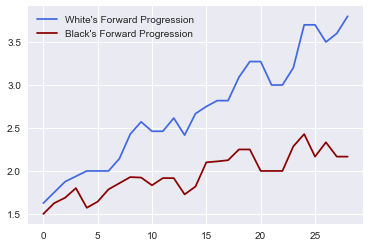

In [50]:
board.time_progression()

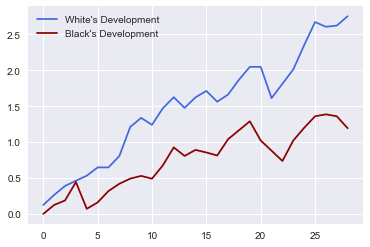

In [51]:
board.time_development()

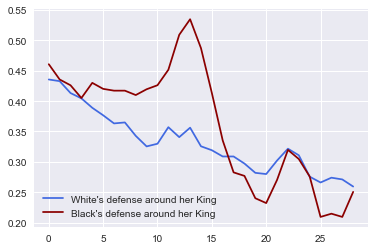

In [52]:
board.time_proximity()

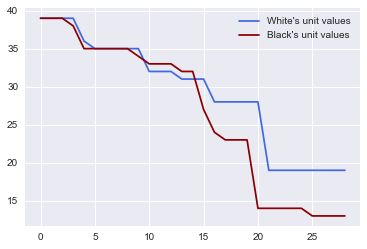

In [53]:
board.time_hardscore()

In [54]:
opener_example

{"Philidor's Defense": ['Pe2e4', 'Pe7e5', 'Ng1f3', 'Pd7d6']}

In [55]:
turnlist = []
for eachd in Parse().parse_game(game1_long).values():
    for each1 in eachd:
        turnlist.append(each1)

for each in opener_example:
    opener = str(opener_example[each])[:-1]
if opener in str(turnlist):
    print(True, each, opener_example[each])

True Philidor's Defense ['Pe2e4', 'Pe7e5', 'Ng1f3', 'Pd7d6']


In [56]:
board.history[-1]

'Ra6a8#'

In [57]:
# # for eachd in Parse().parse_game(game1_long).values():
# #     for each1 in eachd:
# #         board.move(each1)
# #         board.heatmap_coverage()

# for eachd in [*Parse().parse_game(game1_long).values()][:23]:
#     for each1 in eachd:
# #         board.heatmap_coverage()
#         board.move(each1)
# #         pprint(board.returnBoard())

# # board.move('Pa2a3')
# # board.heatmap_coverage()
# # board.move('Pa7a6')
# # board.heatmap_coverage()
# # board.move('Pa2b3')
# # board.heatmap_coverage()
# # board.move('Ng8f6')
# # board.heatmap_coverage()
# pprint(board.returnBoard())

board = Final()
for eachd in [*Parse().parse_game(game1_long).values()][:]:
    for each1 in eachd:
        board.move(each1)
        pprint(board.move(each1)[-1])
        try: print(board.history[-1])
        except: print(board.history)
        print(board.turn)
        print('Last attacking:', board.find_last_attacking())
        print('New attacking:', board.find_new_attacking())
        print('New fork:', board.find_new_fork())
        print('Last defending:', board.find_last_defending())
        print('New defending:', board.find_new_defending())
        print('Last overloaded:', board.find_last_overloaded())
        print('New overloaded:', board.find_new_overloaded())
        print('Discovered Attack:', board.discovered_attack())
        print('')
        print('')

[['R1b', 'N1b', 'B1b', 'Q0b', 'K0b', 'B2b', 'N2b', 'R2b'],
 ['P1b', 'P2b', 'P3b', 'P4b', 'P5b', 'P6b', 'P7b', 'P8b'],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', 'P5w', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['P1w', 'P2w', 'P3w', 'P4w', '   ', 'P6w', 'P7w', 'P8w'],
 ['R1w', 'N1w', 'B1w', 'Q0w', 'K0w', 'B2w', 'N2w', 'R2w']]
Pe2e4
2
Last attacking: None
New attacking: None
New fork: None
Last defending: None
New defending: {}
Last overloaded: None
New overloaded: None
Discovered Attack: None


[['R1b', 'N1b', 'B1b', 'Q0b', 'K0b', 'B2b', 'N2b', 'R2b'],
 ['P1b', 'P2b', 'P3b', 'P4b', '   ', 'P6b', 'P7b', 'P8b'],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', 'P5b', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', 'P5w', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 [

Last attacking: ('N2b', ['P5w'])
New attacking: {'Q0w': ['N2b'], 'N2b': ['P5w']}
New fork: None
Last defending: ('N2b', ['K0b', 'P8b'])
New defending: {'Q0b': ['N2b'], 'R2b': ['B2b'], 'P7b': ['N2b'], 'N2b': ['K0b', 'P8b']}
Last overloaded: ('N2b', 'is overloaded by defending', ['K0b', 'P8b'])
New overloaded: {'Q0b': ['N1b', 'P3b', 'K0b', 'N2b'], 'R2b': ['B2b', 'P8b'], 'N2b': ['K0b', 'P8b']}
Discovered Attack: {}


[['R1b', 'N1b', '   ', 'Q0b', 'K0b', 'B2b', '   ', 'R2b'],
 ['P1b', 'P2b', 'P3b', '   ', '   ', 'P6b', 'P7b', 'P8b'],
 ['   ', '   ', '   ', '   ', '   ', 'N2b', '   ', '   '],
 ['   ', '   ', '   ', '   ', 'P4b', '   ', '   ', '   '],
 ['   ', '   ', 'B2w', '   ', 'P5w', '   ', '   ', '   '],
 ['   ', 'Q0w', '   ', '   ', '   ', '   ', '   ', '   '],
 ['P1w', 'P2w', 'P3w', '   ', '   ', 'P6w', 'P7w', 'P8w'],
 ['R1w', 'N1w', 'B1w', '   ', 'K0w', '   ', '   ', 'R2w']]
Qf3b3
14
Last attacking: ('Q0w', ['P2b'])
New attacking: {'Q0w': ['P2b']}
New fork: None
Last defending: ('Q0w

New overloaded: {'R1b': ['P1b', 'K0b'], 'K0b': ['N1b', 'Q0b', 'P6b', 'B2b'], 'N1b': ['P4b', 'N2b', 'B2b'], 'Q0b': ['N1b', 'P4b', 'K0b', 'N2b', 'P6b', 'B2b'], 'N2b': ['N1b', 'K0b', 'P8b']}
Discovered Attack: {'B2w': ['N1b']}


[['R1b', '   ', '   ', '   ', 'K0b', 'B2b', '   ', 'R2b'],
 ['P1b', '   ', '   ', 'N1b', 'Q0b', 'P6b', 'P7b', 'P8b'],
 ['   ', '   ', '   ', '   ', '   ', 'N2b', '   ', '   '],
 ['   ', 'B2w', '   ', '   ', 'P4b', '   ', 'B1w', '   '],
 ['   ', '   ', '   ', '   ', 'P5w', '   ', '   ', '   '],
 ['   ', 'Q0w', '   ', '   ', '   ', '   ', '   ', '   '],
 ['P1w', 'P2w', 'P3w', '   ', '   ', 'P6w', 'P7w', 'P8w'],
 ['   ', '   ', '   ', 'R1w', 'K0w', '   ', '   ', 'R2w']]
Ra1d1
24
Last attacking: ('R1w', ['N1b'])
New attacking: {'R1w': ['N1b']}
New fork: None
Last defending: ('R1w', ['K0w'])
New defending: {'K0w': ['R1w']}
Last overloaded: None
New overloaded: {'K0w': ['R1w', 'P6w']}
Discovered Attack: {}


[['   ', '   ', '   ', 'R1b', 'K0b', 'B2b', '   ', 'R2b'],
 ['

Last overloaded: None
New overloaded: None
Discovered Attack: {}


[['   ', '   ', 'K0b', '   ', '   ', 'B2b', '   ', 'R2b'],
 ['P1b', '   ', '   ', 'R1w', '   ', 'P6b', 'P7b', 'P8b'],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', 'B2w', 'Q0b', '   ', '   ', '   ', '   ', 'N2b'],
 ['   ', '   ', '   ', '   ', 'P5w', '   ', '   ', '   '],
 ['   ', 'Q0w', '   ', '   ', '   ', '   ', '   ', '   '],
 ['P1w', 'P2w', 'P3w', '   ', '   ', '   ', 'P7w', 'P8w'],
 ['   ', '   ', '   ', '   ', 'K0w', '   ', '   ', 'R2w']]
Kd8c8
35
Last attacking: ('K0b', ['R1w'])
New attacking: None
New fork: None
Last defending: None
New defending: {'Q0b': ['K0b']}
Last overloaded: None
New overloaded: {'Q0b': ['P1b', 'K0b', 'B2b', 'N2b']}
Discovered Attack: None


[['   ', '   ', 'K0b', '   ', '   ', 'B2b', '   ', 'R2b'],
 ['P1b', '   ', '   ', '   ', '   ', 'R1w', 'P7b', 'P8b'],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', 'B2w', 'Q0b', '   ', '   ', '   ', '   ', '

Last attacking: None
New attacking: None
New fork: None
Last defending: ('R2w', ['K0w', 'R1w'])
New defending: {'R1w': ['R2w'], 'K0w': ['R2w'], 'R2w': ['R1w']}
Last overloaded: ('R2w', 'is overloaded by defending', ['K0w', 'R1w'])
New overloaded: {'R1w': ['B2w', 'R2w'], 'R2w': ['K0w', 'R1w']}
Discovered Attack: None


[['   ', '   ', '   ', 'K0b', '   ', 'B2b', '   ', 'R2b'],
 ['   ', '   ', '   ', 'B2w', '   ', 'R1w', '   ', 'P8b'],
 ['P1b', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', '   ', 'P7b', 'N2b'],
 ['   ', '   ', '   ', '   ', 'P5w', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['P1w', 'P2w', 'P3w', '   ', '   ', '   ', 'P7w', 'P8w'],
 ['   ', '   ', '   ', '   ', 'K0w', 'R2w', '   ', '   ']]
Pg7g5
47
Last attacking: None
New attacking: {'R1w': ['P8b']}
New fork: {'R1w': ['B2b', 'P8b']}
Last defending: None
New defending: {}
Last overloaded: None
New overloaded: None
Discovered Attack: {'R1w': ['P

Last attacking: ('R2w', ['K0b'])
New attacking: {'R2w': ['K0b']}
New fork: None
Last defending: ('R2w', ['P1w'])
New defending: {'B2w': ['R2w']}
Last overloaded: None
New overloaded: {'B2w': ['R2w', 'P5w']}
Discovered Attack: {}




In [19]:
new_board = Final()
def narrate(the_game):
    for eachd in Parse().parse_game(the_game).values():
        for each1 in eachd:
            pprint(board.board)
            new_board.move(each1)
            print('')
#     board.time_progression()
#     board.time_development()
#     board.time_proximity()
    
#     new_board = Final()
#     for eachd in [*Parse().parse_game(the_game).values()][:]:
#         for each1 in eachd:
#             new_board.move(each1)

# narrate(game1_long)

In [13]:
board.board

[['R2w', 'K0b', '   ', '   ', '   ', 'B2b', '   ', 'R2b'],
 ['   ', '   ', '   ', '   ', '   ', 'R1w', '   ', 'P8b'],
 ['   ', '   ', 'B2w', '   ', '   ', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', '   ', 'P7b', 'N2b'],
 ['   ', '   ', '   ', '   ', 'P5w', '   ', '   ', 'P8w'],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['P1w', 'P2w', 'P3w', '   ', '   ', '   ', 'P7w', '   '],
 ['   ', '   ', '   ', '   ', 'K0w', '   ', '   ', '   ']]

2
3
4
5
6
7
8
9
10
11
12
13
[['R1b', 'N1b', '   ', 'Q0b', 'K0b', 'B2b', '   ', 'R2b'],
 ['P1b', 'P2b', 'P3b', '   ', '   ', 'P6b', 'P7b', 'P8b'],
 ['   ', '   ', '   ', '   ', '   ', 'N2b', '   ', '   '],
 ['   ', '   ', '   ', '   ', 'P4b', '   ', '   ', '   '],
 ['   ', '   ', 'B2w', '   ', 'P5w', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', 'Q0w', '   ', '   '],
 ['P1w', 'P2w', 'P3w', '   ', '   ', 'P6w', 'P7w', 'P8w'],
 ['R1w', 'N1w', 'B1w', '   ', 'K0w', '   ', '   ', 'R2w']]


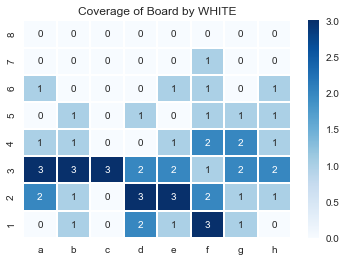

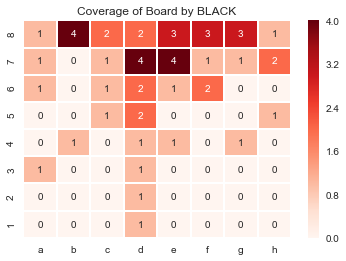

In [61]:
board = Final()
board.board
for eachd in [*Parse().parse_game(game1_long).values()][:6]:
    for each1 in eachd:
        board.move(each1)
        print(board.turn)
pprint(board.board)
board.heatmap_coverage();